#### 1. Chuẩn bị dữ liệu:


In [1]:
# Import thư viện cần thiết
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Đọc dữ liệu từ file Excel
df = pd.read_excel('data_slr.xlsx',sheet_name="data")

df

,TimeAds,ProfitRate
0,0.5,1
1,2.0,2
2,4.0,7
3,5.0,8
4,3.0,5
5,6.0,8
6,7.0,9
7,9.0,12
8,8.0,10
9,1.0,3


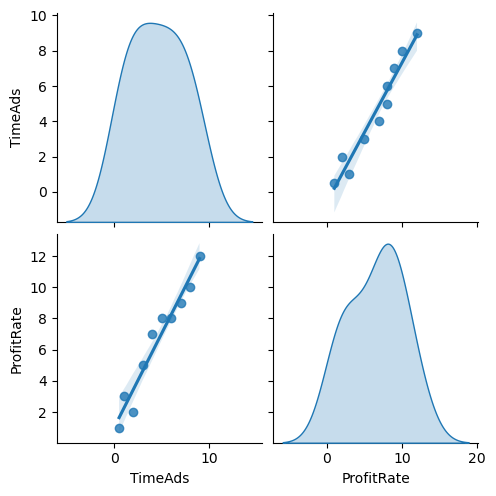

In [3]:
# Vẽ biểu đồ kiểm tra mối quan hệ giữa các biến
sns.pairplot(df[['TimeAds','ProfitRate']], 
             diag_kind='kde', kind='reg')
plt.show()

#### 2. Xử lý dữ liệu:


In [4]:
# Tách dữ liệu thành X (input) và y (output)
X = df[['TimeAds']].values  # Biến độc lập
y = df[['ProfitRate']].values  # Biến phụ thuộc

# Chuyển đổi sang kiểu số thực
X = X.astype(float)
y = y.astype(float)



In [5]:
# Chia dữ liệu thành tập train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.4, 
                                                    random_state=16)

#### 3. Xây dựng và huấn luyện mô hình:


In [6]:
from sklearn import linear_model 

# Khởi tạo mô hình
model = linear_model.LinearRegression()

# Huấn luyện mô hình với dữ liệu training
model.fit(X_train,y_train)

LinearRegression()

#### 4. Đánh giá mô hình:


In [7]:
import numpy as np
from sklearn import metrics

# Dự đoán trên tập test
y_test_pred = model.predict(X_test)

# Tính các chỉ số đánh giá
print('Score or R-Squared:', model.score(X_test, y_test))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared: 0.9643356772543376
Mean Absolute Error: 0.6710526315789472
Root Mean Squared Error: 0.7598132826197573
Mean Absolute Percentage Error: 0.2563321181742236


#### 5. Kiểm tra và trực quan hóa kết quả:


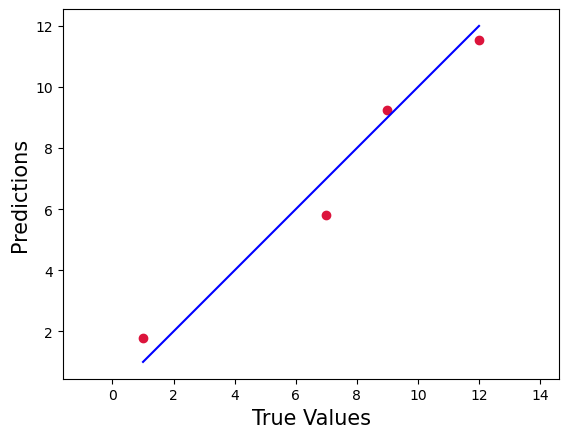

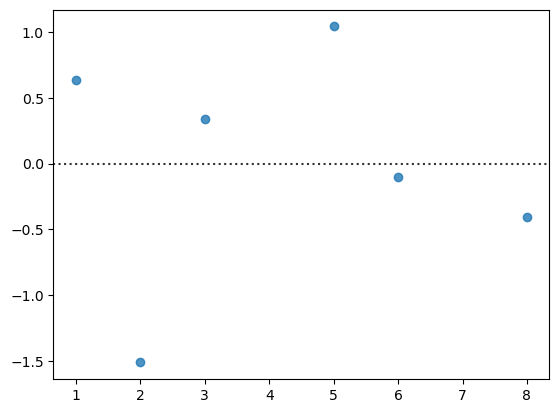

In [8]:
# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.scatter(y_test, y_test_pred, c='crimson')
p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Vẽ residual plot
sns.residplot(x=X_train, y=y_train)
plt.show()

#### 6. Lưu trữ và load mô hình:


In [9]:
# Lưu mô hình
import pickle
pickle.dump(model, open('model_linear_regression.sav', 'wb'))

# Load mô hình
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))

#### 7.  Sử dụng mô hình để dự đoán:


In [10]:
# Nhập dữ liệu mới và dự đoán
vTimeAds = float(input('Nhập thời lượng quảng cáo: '))
predicted_ProfitRate = loaded_model.predict([[vTimeAds]])
print(f'Dự báo điểm ProfitRate là: {predicted_ProfitRate}')

Dự báo điểm ProfitRate là: [[13.84688995]]
